In [0]:
import pandas as pd
import sys
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# from google.colab import drive

# drive.mount('/content/drive/')


In [0]:
data = pd.read_csv("YearPredictionMSD.txt", 
                   delimiter=',', header=None)
copy_data = data.copy()
y_actual = data.iloc[:, 0]
data = data.drop([0], axis = 1)

In [0]:
def find_missing_val(data):
	missing_value = data.isnull().sum()/len(data)*100 
	# took arbitrary threshold to check the missing values
	print('Missing Value\n ', missing_value)
	missing_value = np.array(missing_value)
	variables = data.columns
	variables = np.array(variables)
	variable = []
	for i in range(0, 12):
		if missing_value[i] <=20:
			variable.append(variables[i])


In [0]:
# Normalizing the data into [0,1]
def normalize_data(data):
	min_max_scaler = preprocessing.MinMaxScaler()
	x_scaled = min_max_scaler.fit_transform(data) 
	print(x_scaled)
	data = pd.DataFrame(x_scaled)
	print(data)
	return data

In [0]:
# feature selection
def random_forest_features(data, y_actual):
  model = RandomForestRegressor (random_state = 1, max_depth = 10)
  data = pd.get_dummies(data)
  model.fit(data, y_actual)

  #plotting the feature importance graph
  features = data.columns
  importance = model.feature_importances_
  indices = np.argsort(importance)[-35:]
  print('Important Columns', indices)
  plt.title('Feature Importances')
  plt.barh(range(len(indices)), importance[indices], color = 'b', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show
  return indices

In [0]:
# def backward_feature_selection(data):
# requires training of model 

In [0]:
def pca_reduction(data):
  pca = PCA(n_components = 35)
  pca_result = pca.fit(data)
  print(pca.explained_variance_ratio_)
  # explains variance component-wise
  plt.plot(range(35), pca.explained_variance_ratio_)
  # explains variance cumulatively
  plt.plot(range(35), np.cumsum(pca.explained_variance_ratio_))
  plt.title("Variance depiction")
  return

In [0]:
df1 = data.head(int(len(data)/2))
print(len(df1))

257672


In [0]:
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
def feature_selection(X, y):
  model = ExtraTreesClassifier()
  model.fit(X, y)
  # print(model.feature_importances_)
  indices = np.argsort(model.feature_importances_)[-35:]
  print('Important Features', indices)
  feat_importances = pd.Series(model.feature_importances_, index=X.columns)
  feat_importances.nlargest(35).plot(kind='barh')
  plt.show()
  return indices

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [0]:
def linear_reg (Xtrain, ytrain, Xtest, ytest):
  model = LinearRegression()
  model.fit(Xtrain, ytrain)
  
  y_predict = model.predict(Xtest)
  y_predict = y_predict.astype(int)
  # y_predict = pd.DataFrame(y_predict)
  ytest = np.array(ytest)
  correct_score = 0
  for i in range(len(y_predict)):
        if y_predict[i] in range(ytest[i]-2, ytest[i]+3):
            correct_score += 1
  print(correct_score)
  acc = (correct_score/(len(y_predict)))*100
  print(acc)
  # print('Mean squared error', mean_squared_error(ytest, y_predict))
  # print('R2-Score', r2_score(ytest, y_predict))
  print('Accuracy', accuracy_score(ytest, y_predict))
  # print(y_predict)
  # print(ytest)
  

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [0]:
def Log_reg(Xtrain, ytrain, Xtest, ytest):
  model = LogisticRegression(random_state=0).fit(Xtrain, ytrain)
  y_predict = model.predict(Xtest)
  print('Logistic Regression', accuracy_score(ytest, y_predict))

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [0]:
def naive_bayes(Xtrain, ytrain, Xtest, ytest):
  clf = GaussianNB()
  clf.fit(Xtrain, ytrain)
  y_predict = clf.predict(Xtest)
  print(accuracy_score(ytest, y_predict))


In [0]:
def knn(Xtrain, ytrain, Xtest, ytest):
  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(Xtrain, ytrain)
  y_predict = clf.predict(Xtest)
  print('KNN Accuracy', accuracy_score(ytest, y_predict))

In [0]:
if __name__ == '__main__':
	find_missing_val(copy_data) 


Missing Value
  0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
86    0.0
87    0.0
88    0.0
89    0.0
90    0.0
Length: 91, dtype: float64


In [0]:
  data = normalize_data(data)

[[0.80029322 0.49720522 0.59962919 ... 0.33485467 0.50033844 0.3622005 ]
 [0.78017703 0.49298723 0.59521998 ... 0.35468663 0.50612212 0.38547698]
 [0.81712402 0.5116055  0.57196419 ... 0.3373761  0.50485871 0.35943768]
 ...
 [0.72033708 0.48498383 0.42042502 ... 0.32877928 0.50582106 0.35242359]
 [0.70435631 0.51233719 0.47712151 ... 0.36651433 0.50318621 0.39758704]
 [0.83207093 0.54940654 0.52479925 ... 0.32957503 0.5043662  0.37155575]]
              0         1         2         3         4         5         6   \
0       0.800293  0.497205  0.599629  0.332545  0.370583  0.276962  0.452564   
1       0.780177  0.492987  0.595220  0.341113  0.386532  0.229635  0.546232   
2       0.817124  0.511606  0.571964  0.342073  0.394968  0.254988  0.512831   
3       0.772129  0.464800  0.540674  0.319971  0.411973  0.224074  0.535929   
4       0.817341  0.525963  0.590047  0.331972  0.374082  0.261984  0.487309   
...          ...       ...       ...       ...       ...       ...       ...

[0.46912909 0.1444523  0.09160718 0.04941731 0.03096672 0.02269594
 0.01785067 0.01629601 0.01549984 0.0126568  0.01153653 0.00977816
 0.00850273 0.00720146 0.00708046 0.00658343 0.0057346  0.005499
 0.00517693 0.00401716 0.00391385 0.0037987  0.00363725 0.00342145
 0.00324639 0.00304764 0.00263598 0.00245062 0.00221461 0.00204441
 0.00189609 0.00163114 0.00157499 0.00137945 0.00134028]


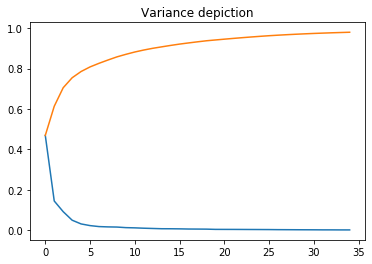

In [0]:
	pca_reduction(data)
  # leaves data with the highest variance.
  

C:\Users\kamya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Important Columns [87 73 89 11 66 72 16 58  9 26 38  8 68 22 84 24  3  4 46 15 77  6 37 39
 62 40 12 35 19 56  5  1 13  2  0]


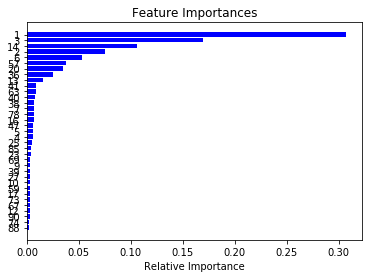

In [0]:
  indices = random_forest_features(data, y_actual)

In [0]:
  print(data.shape)
  print(data)

(515345, 90)
              1         2         3         4         5         6         7   \
0       49.94357  21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   
1       48.73215  18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630   
2       50.95714  31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872   
3       48.24750  -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   
4       50.97020  42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207   
...          ...       ...       ...       ...       ...       ...       ...   
515340  51.28467  45.88068  22.19582  -5.53319  -3.61835 -16.36914   2.12652   
515341  49.87870  37.93125  18.65987  -3.63581 -27.75665 -18.52988   7.76108   
515342  45.12852  12.65758 -38.72018   8.80882 -29.29985  -2.28706 -18.40424   
515343  44.16614  32.38368  -3.34971  -2.49165 -19.59278 -18.67098   8.78428   
515344  51.85726  59.11655  26.39436  -5.46030 -20.69012 -19.95528  -6.72771   

              8         9 

C:\Users\kamya\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Important Features [45 38 72 77 39 52 32 85 73 20 66 87 30 12 56  7 13 58 78 82 62 40 21 11
 10  8  3  9 19  4  2  6  5  1  0]


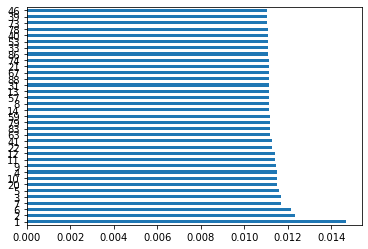

In [0]:
  features = feature_selection(data, y_actual)

In [0]:
  # in order to get the best features from both the methods I have taken the intersection 
  resultant_features = set(set(indices) & set(features))
  print('Final Important Features', resultant_features)

Final Important Features {0, 1, 2, 3, 4, 5, 6, 66, 8, 9, 73, 11, 12, 19, 87, 38, 40, 56, 58, 62}


In [0]:
  # pruning the data based on the these features. 
  pruned_data = []
  for i in data.columns:
      if i in resultant_features:
          # print(data.iloc[:, i])
          pruned_data.append(np.array(data.iloc[:,i]))

  pruned_data = np.array(pruned_data)
  pruned_data = pruned_data.transpose()
  pruned_data = pd.DataFrame(pruned_data)
  print('Pruned Dataset\n', pruned_data.shape)
  print(pruned_data)

Pruned Dataset
 (515345, 19)
               0         1         2         3         4         5         6  \
0       21.47114  73.07750   8.74861 -17.40628 -13.09905 -25.01202   7.83089   
1       18.42930  70.32679  12.94636 -10.32437 -24.83777   8.76630  18.76548   
2       31.85602  55.81851  13.41693  -6.57898 -18.54940  -3.27872  16.07017   
3       -1.89837  36.29772   2.58776   0.97170 -26.21683   5.05097   3.55005   
4       42.20998  67.09964   8.46791 -15.85279 -16.81409 -12.48207  12.63699   
...          ...       ...       ...       ...       ...       ...       ...   
515340  45.88068  22.19582  -5.53319  -3.61835 -16.36914   2.12652  -8.66890   
515341  37.93125  18.65987  -3.63581 -27.75665 -18.52988   7.76108  -2.50351   
515342  12.65758 -38.72018   8.80882 -29.29985  -2.28706 -18.40424  -4.52429   
515343  32.38368  -3.34971  -2.49165 -19.59278 -18.67098   8.78428 -12.01230   
515344  59.11655  26.39436  -5.46030 -20.69012 -19.95528  -6.72771  10.31018   

          

In [0]:
  # x_train, x_test, y_train, y_test = train_test_split(pruned_data, y_actual, test_size = 0.1)
  pruned_data = np.array(pruned_data)
  y_actual = np.array(y_actual)
  k = len(pruned_data)/10
  for i in range(10):
    Xtrain, Xtest, ytrain, ytest = [], [], [], []
    for j in range(int(i*k), int(i*k + k)):
        Xtest.append(pruned_data[j])
        ytest.append(y_actual[j])
    Xtest = np.array(Xtest)
    ytest = np.array(ytest)
    print(Xtest)
    j = int(i*len(pruned_data)/10)
    if j != 0:
        for t in range(j):
            Xtrain.append(pruned_data[t])
            ytrain.append(y_actual[t])
    j = int(i*k + k)
    if (j != len(pruned_data)-1):
        while(j < len(pruned_data)):
            Xtrain.append(pruned_data[j])
            ytrain.append(y_actual[j])
            j += 1
    Xtrain = np.array(Xtrain)
    ytrain = np.array(ytrain)
    # print(x_train, y_train, x_test, y_test)
    linear_reg(Xtrain, ytrain, Xtest, ytest)
    # calling the logistic regression within kfold
    Log_reg(Xtrain, ytrain, Xtest, ytest)

[[ 2.1471140e+01  7.3077500e+01  8.7486100e+00 ...  4.6952500e+00
   7.1987700e+00 -1.8222300e+00]
 [ 1.8429300e+01  7.0326790e+01  1.2946360e+01 ... -8.8378820e+01
  -4.0005500e+00  1.2049410e+01]
 [ 3.1856020e+01  5.5818510e+01  1.3416930e+01 ... -1.2142790e+01
   4.3373810e+01 -5.8590000e-02]
 ...
 [ 2.4886190e+01  2.2490290e+01 -1.0561640e+01 ...  3.3532390e+01
  -1.0056328e+02 -6.0950400e+00]
 [ 3.0985610e+01  1.6275400e+01 -4.7375300e+00 ...  6.4343520e+01
   2.5854040e+01  6.6934200e+00]
 [ 3.7473100e+00  6.0961900e+00 -1.5503580e+01 ...  2.1819024e+02
  -1.2966640e+02  1.4862630e+01]]
10422
20.223541739434157
Accuracy 0.040613963596848685
[[ 2.659106e+01  4.339529e+01 -5.554080e+00 ...  8.178340e+00
  -2.169435e+01  3.403300e+00]
 [-6.697173e+01 -1.990169e+01 -2.079217e+01 ...  4.451856e+01
  -1.981450e+01  1.247000e-02]
 [ 1.826423e+01  6.319223e+01  2.751650e+00 ... -4.358985e+01
   1.091618e+01  6.222770e+00]
 ...
 [-2.794199e+01 -1.290641e+01 -1.401572e+01 ... -4.306413e+01

In [0]:
  # poly_reg(x_train, y_train, x_test, y_test)
  x_train, x_test, y_train, y_test = train_test_split(data, y_actual, test_size = 0.1)
  

In [0]:
  naive_bayes(x_train, y_train, x_test, y_test)

0.02590472494421267
